# $m_{4\ell}$ analysis

Let's start off with a "dumb" analysis: a binned histogram analysis using $m_{4\ell}$ as the summary statistic.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import importlib

from hstar import c6

In [2]:
# read dataset
filepath = '/u/taepa/higgs-trilinear-sensitivity/data/samples/ggZZ_all/events.csv'
events = pd.read_csv(filepath)
ggzz = c6.Sample(k=1.83, xs=1.4783394 * 4, events=events) # cross-section x k-factor x 4l channels (ignoring interference for now) [fb]
lumi = 300.0
ggzz.normalize(lumi)

,evtnum,p1_px,p1_py,p1_pz,p1_E,p2_px,p2_py,p2_pz,p2_E,p3_px,...,msq_c6_14,msq_c6_15,msq_c6_16,msq_c6_17,msq_c6_18,msq_c6_19,msq_c6_20,msq_c6_21,msq_sm,wt
0,0,0.0,0.0,-253.25920,-253.25920,0.0,0.0,43.80087,-43.80087,3.418067,...,1.311460e-08,1.311711e-08,1.312060e-08,1.312512e-08,1.313072e-08,1.313747e-08,1.314548e-08,1.315483e-08,1.311264e-08,0.000274
1,1,0.0,0.0,-105.41780,-105.41780,0.0,0.0,83.06607,-83.06607,-33.927600,...,1.624623e-08,1.624879e-08,1.625244e-08,1.625720e-08,1.626311e-08,1.627022e-08,1.627859e-08,1.628827e-08,1.624494e-08,0.000259
2,2,0.0,0.0,-176.49030,-176.49030,0.0,0.0,69.49255,-69.49255,-23.966820,...,5.646427e-09,5.647883e-09,5.649893e-09,5.652477e-09,5.655658e-09,5.659462e-09,5.663923e-09,5.669079e-09,5.645296e-09,0.000337
3,3,0.0,0.0,-73.21253,-73.21253,0.0,0.0,435.57040,-435.57040,32.089890,...,9.708751e-11,9.714519e-11,9.723117e-11,9.734593e-11,9.749014e-11,9.766467e-11,9.787056e-11,9.810907e-11,9.708228e-11,0.001838
4,4,0.0,0.0,-395.79670,-395.79670,0.0,0.0,24.94625,-24.94625,-50.250540,...,7.705212e-09,7.707123e-09,7.709840e-09,7.713385e-09,7.717782e-09,7.723063e-09,7.729268e-09,7.736440e-09,7.704206e-09,0.001209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1757016,1757016,0.0,0.0,-687.74180,-687.74180,0.0,0.0,73.23199,-73.23199,-34.079310,...,2.652363e-10,2.651421e-10,2.651393e-10,2.652374e-10,2.654501e-10,2.657955e-10,2.662960e-10,2.669783e-10,2.660369e-10,0.000258
1757017,1757017,0.0,0.0,-49.84977,-49.84977,0.0,0.0,180.87460,-180.87460,-7.083436,...,3.659092e-09,3.659718e-09,3.660619e-09,3.661806e-09,3.663293e-09,3.665098e-09,3.667243e-09,3.669751e-09,3.658797e-09,0.000114
1757018,1757018,0.0,0.0,-281.49190,-281.49190,0.0,0.0,55.07830,-55.07830,12.580450,...,1.788798e-09,1.790141e-09,1.791999e-09,1.794393e-09,1.797346e-09,1.800892e-09,1.805065e-09,1.809908e-09,1.787754e-09,0.000262
1757019,1757019,0.0,0.0,-173.10800,-173.10800,0.0,0.0,147.21930,-147.21930,-38.599040,...,1.059063e-11,1.059203e-11,1.059354e-11,1.059558e-11,1.059874e-11,1.060377e-11,1.061156e-11,1.062316e-11,1.058505e-11,0.000085


In [3]:
# compute m4l
ileptons = range(3,7)
p4l_px = np.sum([ggzz.events[f'p{i}_px'] for i in ileptons], axis=0)
p4l_py = np.sum([ggzz.events[f'p{i}_py'] for i in ileptons], axis=0)
p4l_pz = np.sum([ggzz.events[f'p{i}_pz'] for i in ileptons], axis=0)
p4l_E = np.sum([ggzz.events[f'p{i}_E'] for i in ileptons], axis=0)
m4l = np.sqrt(p4l_E**2 - p4l_px**2 - p4l_py**2 - p4l_pz**2)

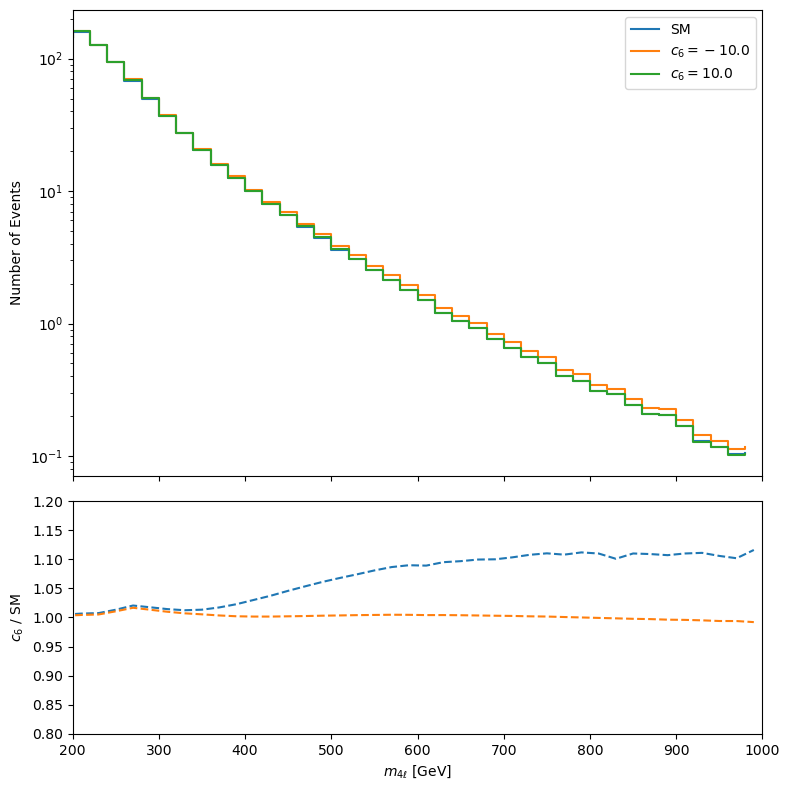

In [4]:
m4l_bins = np.arange(180.0,1020.0,20.0)
m4l_centers = 0.5 * (m4l_bins[1:] + m4l_bins[:-1])

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8), sharex=True, height_ratios=(2,1))

m4l_sm, _ = np.histogram(m4l, bins=m4l_bins, weights=ggzz.nu(per_event=True))
ax1.step(m4l_bins[:-1], m4l_sm, where='post', label='SM')

c6_val = -10.0
m4l_c6, _ = np.histogram(m4l, bins=m4l_bins, weights=ggzz.nu(c6_val, per_event=True))
ax1.step(m4l_bins[:-1], m4l_c6, where='post', label=f'$c_6 = {c6_val}$')
ratio = np.divide(m4l_c6, m4l_sm, out=np.zeros_like(m4l_sm), where=m4l_sm!=0)
ax2.plot(m4l_centers, ratio, '--', label=f'$c_6 = {c6_val}$')

c6_val = +10.0
m4l_c6, _ = np.histogram(m4l, bins=m4l_bins, weights=ggzz.nu(c6_val, per_event=True))
ax1.step(m4l_bins[:-1], m4l_c6, where='post', label=f'$c_6 = {c6_val}$')
ratio = np.divide(m4l_c6, m4l_sm, out=np.zeros_like(m4l_sm), where=m4l_sm!=0)
ax2.plot(m4l_centers, ratio, '--', label=f'$c_6 = {c6_val}$')

ax1.set_xlim(200,1000)
ax1.set_ylabel('Number of Events')
ax1.set_yscale('log')
ax1.legend()

ax2.set_ylim(0.8,1.2)
ax2.set_xlabel('$m_{4\ell}$ [GeV]')
ax2.set_ylabel('$c_6$ / SM')

plt.tight_layout()
plt.show()

In [6]:
from inference import poisson
importlib.reload(poisson)

c6_vals = np.arange(-20.0,20.0,0.5)
nll_c6 = np.zeros_like(c6_vals)

m4l_sm, _ = np.histogram(m4l, bins=m4l_bins, weights=ggzz.nu(per_event=True))
for i, c6_val in enumerate(c6_vals):
  m4l_c6, _ = np.histogram(m4l, bins=m4l_bins, weights=ggzz.nu(c6_val, per_event=True))
  nll_c6[i] = poisson.nll(m4l_sm, m4l_c6)

In [ ]:
imin = np.argmin(nll_c6)
nll_min = nll_c6[imin]
c6_at_nll_min = c6_vals[imin]
plt.plot(c6_vals, nll_c6 - nll_min)
plt.scatter(c6_at_nll_min, 0.0, marker='o', color='red')